Results from Level IW algorithm (for boxplot and accuracy timelime).
One Class Horizontal Translation. 2 Dimensional data.
100 batches of 152 instances



METHOD: Static sgd as classifier
Execution time:  0.03974483722844906
Average MCC:  0.976231903673
Average macro-F1: 0.987926935989323
Average Accuracy:  98.8673
Standard Deviation:  1.17702918825
Variance:  1.38539771


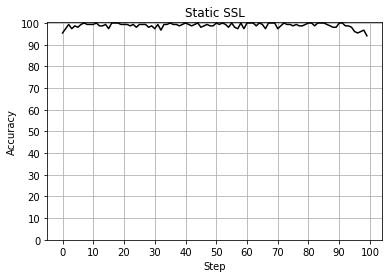

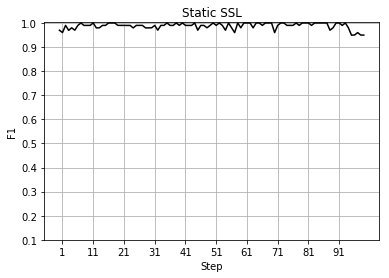




METHOD: Sliding sgd as classifier
Execution time:  0.13086316744276627
Average MCC:  0.935744821692
Average macro-F1: 0.9658840380701966
Average Accuracy:  96.6115
Standard Deviation:  3.11896308891
Variance:  9.72793075


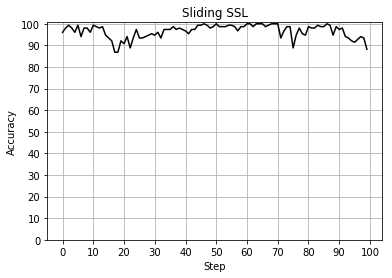

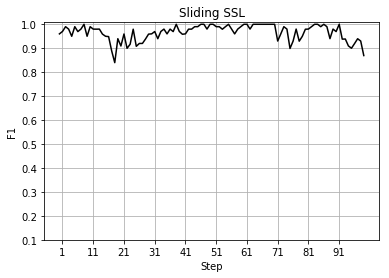




METHOD: sgd as classifier and kde and Hellinger distance as dynamic CSE
similarity = 0.6366324265929573, reset = False 
similarity = 0.9, reset = False 
similarity = 0.9, reset = False 
similarity = 0.9, reset = False 
similarity = 0.6681724379208467, reset = False 
similarity = 0.5, reset = True 
similarity = 0.7012646722731847, reset = False 
similarity = 0.5, reset = False 
similarity = 0.5, reset = False 
similarity = 0.5031520158023374, reset = False 
similarity = 0.5, reset = False 
similarity = 0.9, reset = False 
similarity = 0.5, reset = False 
similarity = 0.9, reset = False 
similarity = 0.9, reset = False 
similarity = 0.8058845078603909, reset = False 
similarity = 0.5, reset = True 
similarity = 0.5, reset = False 
similarity = 0.5, reset = False 
similarity = 0.5, reset = False 
similarity = 0.5, reset = False 
similarity = 0.5597732682101587, reset = False 
similarity = 0.6635320957646822, reset = False 
similarity = 0.5, reset = False 
similarity = 0.770669976584757

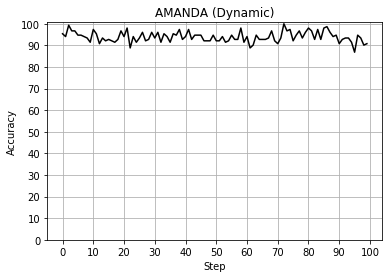

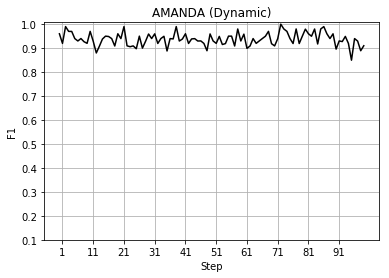




Method: Level IW
Execution time:  59.044445682306
Average MCC:  -0.00354189872723
Average F1:  0.166083794305


C:\Users\raul\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\raul\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1115: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Average Accuracy:  99.60526
Standard Deviation:  1.07702871772
Variance:  1.1599908588


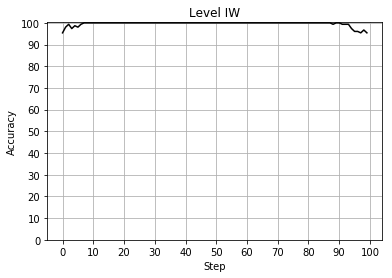

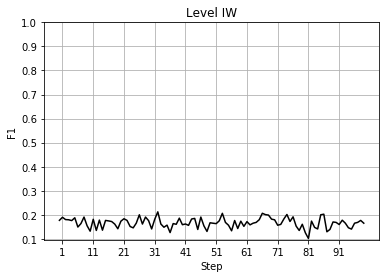

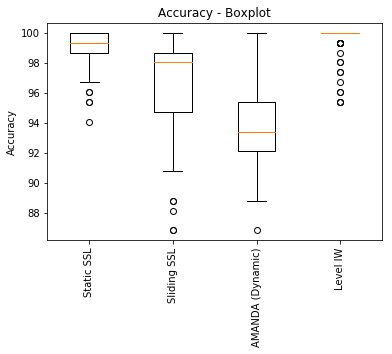

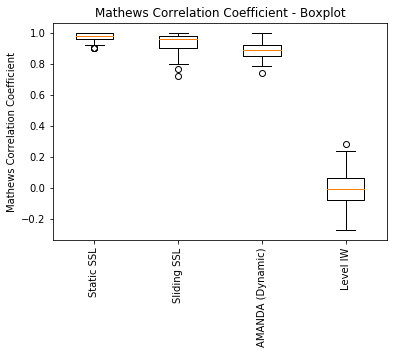

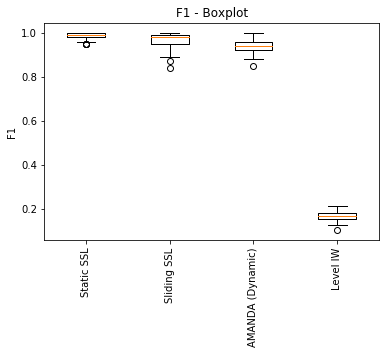

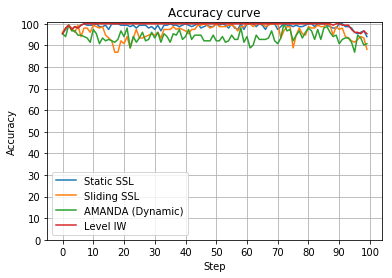

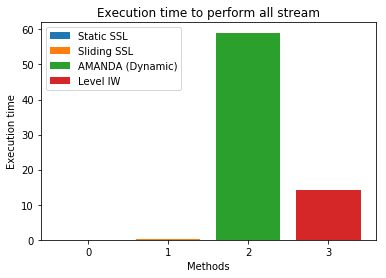

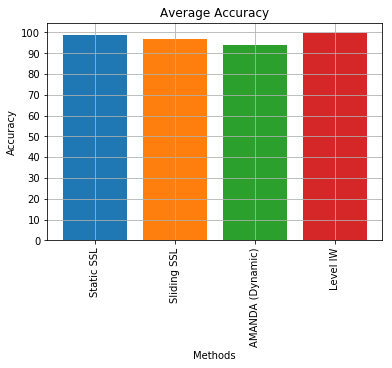

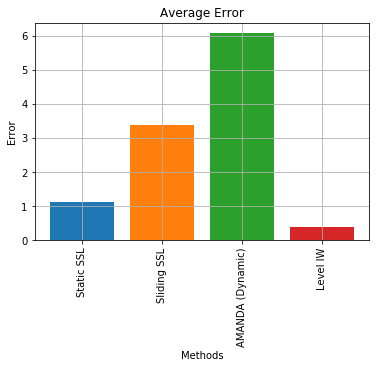

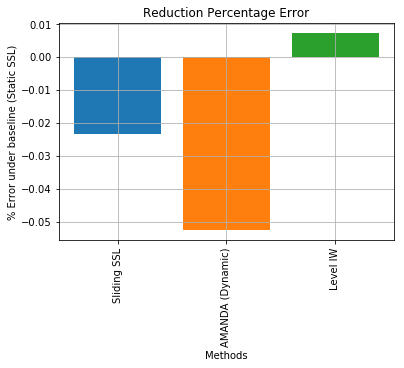

In [1]:
import sys
import os
from pathlib import Path
os.chdir(Path(os.getcwd()).resolve().parents[3])

import setup
from methods import runExperiments
from methods import static_classifier
from methods import amanda_dynamic
from methods import amanda_fixed
from methods import incremental_LN
from methods import deslizante_LN
from methods import compose_gmm_version


class Experiment():
     def __init__(self, method, K=None, excludingPercentage=None, densityFunction=None, clfName=None):
        self.method = method
        self.clfName = clfName
        self.densityFunction=densityFunction
        self.excludingPercentage = excludingPercentage
        self.K_variation = K


def loadLevelResults(path, sep, key, steps):
    originalAccs, F1s, time = setup.loadLevelIwBoxplotResults(path, sep)
    predictions = F1s[key]
    predictions = [ predictions[i::steps] for i in range(steps) ]
    
    return predictions, originalAccs[key], time[key]


def main():
    experiments = {}
    is_windows = sys.platform.startswith('win')
    sep = '\\'

    if is_windows == False:
        sep = '/'

    path = os.getcwd()+sep+'data'+sep
    
    # SETTINGS
    sslClassifier = 'sgd' # lp = label propagation, rf = random forests, nb = naive bayes, knn = k-nn, sgd = stochastic gradient descent
    steps = 100
    poolSize = None
    isBatchMode = True # False = Stream
    isBinaryClassification = True
    isImbalanced = False
    externalResults = []
    
    # Load dataset
    dataValues, dataLabels, description = setup.loadCHT(path, sep)
    
    # Only 5% of initial labeled data - Extreme verification latency scenario
    labeledData = int(0.05*len(dataLabels))

    # Static SSL
    experiments[0] = Experiment(static_classifier, 5, clfName=sslClassifier)
    
    # Sliding SSL
    experiments[1] = Experiment(deslizante_LN, 5, clfName=sslClassifier)
    
    # Incremental SSL
    #experiments[2] = Experiment(incremental_LN, 5, clfName=sslClassifier)
    
    # Proposed Method 1 (AMANDA - Fixed core extraction percentage)
    #experiments[3] = Experiment(amanda_fixed, 5, 0.6, "kde", clfName=sslClassifier)

    # Proposed method 2 (AMANDA - Dynamic core extraction percentage)
    experiments[4] = Experiment(amanda_dynamic, 5, None, "kde", clfName=sslClassifier)

    # COMPOSE GMM (Python version)
    #experiments[5] = Experiment(compose_gmm_version, 5)
    
    # levelIw matlab results
    predictionsLevelIw, originalAccsLevelIw, timeLevelIw = loadLevelResults(path, sep, '1CHT', steps)
    externalResults.append({"name":"Level IW", "predictions":predictionsLevelIw, "accuracies":originalAccsLevelIw, "time":timeLevelIw})
    
    # Run experiments
    runExperiments.run(dataValues, dataLabels, description, isBinaryClassification, isImbalanced, 
                       experiments, steps, labeledData, isBatchMode, poolSize, externalResults)
    

if __name__ == "__main__":
    main()